#### Chapter 14 : Regression Diagnostics and Structure

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats
import statsmodels.api as sm

In [2]:
# Helper functions imported from textbook
def p_rtail(sampdist,tstat): 
    points = sns.kdeplot(sampdist).get_lines()[0].get_data() # get x and y values from plot 
    x = points[0] 
    y = points[1] 
    plt.fill_between(x,y, where = x > tstat, color='r') 
    plt.fill_between(x,y, where = x <= tstat, color='g') 
    plt.show() 
    pvalue = np.sum(sampdist < tstat) / len(sampdist) 
    return pvalue 

def p_ltail(sampdist,tstat): 
    points = sns.kdeplot(sampdist).get_lines()[0].get_data() 
    x = points[0] 
    y = points[1] 
    plt.fill_between(x,y, where = x < tstat, color='r') 
    plt.fill_between(x,y, where = x >= tstat, color='g') 
    plt.show() 
    pvalue = np.sum(sampdist > tstat) / len(sampdist) 

    return pvalue 

def p_2tail(sampdist,tstat):
    points = sns.kdeplot(sampdist).get_lines()[0].get_data() 
    hyp = np.mean(sampdist) 
    cutoff1 = hyp - np.abs(hyp - tstat) 
    cutoff2 = hyp + np.abs(hyp - tstat) 
    x = points[0] 
    y = points[1] 
    plt.fill_between(x,y, where = (x < cutoff1) | (x > cutoff2), color='r') 
    plt.fill_between(x,y, where = (x >= cutoff1) & (x <= cutoff2), color='g') 
    plt.show() 
    pvalue = np.sum((sampdist < cutoff1) | (sampdist > cutoff2)) / len(sampdist) 
    return pvalue 

1. Read the file Corn.csv. Develop an appropriate regression structure to predict yield.  
 

Read the file Credit.csv. Develop an appropriate regression structure to predict the binary outcome Creditworthy based on all the other variables in the dataframe. 

In [3]:
#corn csv imported into the directory.
#1. check the data 
corn = pd.read_csv("Corn.csv")
corn.head(5)

,nitrate,yield
0,9.59,4713.00
1,7.51,1049.45
2,8.00,1537.89
3,13.93,5116.24
4,29.10,8835.98


In [5]:
# check for colinearities
corn[['nitrate','yield']].corr()
#no input variables have a correlation of 0.5 or above

,nitrate,yield
nitrate,1.000000,0.439319
yield,0.439319,1.000000


In [8]:
lm = sm.OLS(corn['yield'], corn[['nitrate']])    

model = lm.fit()    

model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  yield   R-squared (uncentered):                   0.749
Model:                            OLS   Adj. R-squared (uncentered):              0.747
Method:                 Least Squares   F-statistic:                              296.2
Date:                Sun, 23 Oct 2022   Prob (F-statistic):                    1.61e-31
Time:                        18:07:56   Log-Likelihood:                         -969.71
No. Observations:                 100   AIC:                                      1941.
Df Residuals:                      99   BIC:                                      1944.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
nitrate      205.9364     11.966     17.210      0.000     182.194     229.679
==============================================================================
Omnibus:                       26.953   Durbin-Watson:                   0.697
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.448
Skew:                          -1.159   Prob(JB):                     2.23e-10
Kurtosis:                       5.301   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

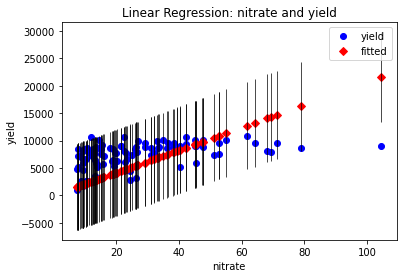

<Figure size 720x720 with 0 Axes>

In [9]:
# Regression plot  

fig, ax = plt.subplots()  

fig = sm.graphics.plot_fit(model, 0, ax=ax)   

plt.figure(figsize=(10, 10))  

ax.set_ylabel("yield") 

ax.set_xlabel("nitrate")  

ax.set_title("Linear Regression: nitrate and yield")  

plt.show() 

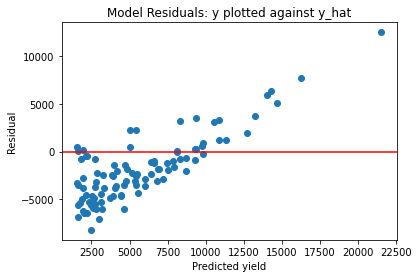

In [16]:
#check residuals
#Calculate the residuals: 

y_pred = model.predict() 

residuals = model.predict() - corn['yield'] 

plt.scatter(y_pred,residuals) 

  

plt.title("Model Residuals: y plotted against y_hat") 

plt.axhline(0, color='red')  

  

plt.xlabel("Predicted yield")  

plt.ylabel("Residual")  

  

plt.show() 

2. Read the file women.csv. Develop an appropriate regression structure to predict height.

In [10]:
#csv imported into the directory.
#1. check the data 
women = pd.read_csv("Women.csv")
women.head(5)

,height,weight
0,58,115
1,59,117
2,60,120
3,61,123
4,62,126


In [12]:
#2.check for colinearities
women[['height','weight']].corr()
#no input variables have a correlation of 0.5 or above

,height,weight
height,1.000000,0.995495
weight,0.995495,1.000000


In [ ]:
#The correlation between the two variables are too high for linear regression. 

3.Read the file Boston.csv. Develop an appropriate regression structure to predict medv which is the median value of incomes in neighborhoods of the city of Boston.  

In [21]:
#csv imported into the directory.
#1. check the data 
boston = pd.read_csv("Boston.csv")
boston.head(30)
boston.fillna(boston.mean())

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [22]:
boston.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [23]:
#crim-rad, dis-nox,crim-tax,indus-lstat,nox-lstat,lstat-medv have high correlation.
boston_diff = boston.diff()

In [24]:
boston_diff.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.000000,-0.015599,0.016338,0.002326,0.055087,-0.057541,0.052745,-0.046203,0.046168,0.018797,-0.007062,-0.081161,-0.023351,-0.087532
zn,-0.015599,1.000000,-0.311678,-0.041202,-0.345838,0.063929,-0.161722,0.341462,-0.197233,-0.115334,-0.188003,0.000908,-0.120220,0.123969
indus,0.016338,-0.311678,1.000000,0.063786,0.290194,-0.083995,0.165713,-0.332360,0.080942,0.259282,0.074049,-0.001360,0.147831,-0.150003
chas,0.002326,-0.041202,0.063786,1.000000,0.064586,0.104986,0.024731,-0.109007,0.096467,0.030246,-0.051665,-0.003562,-0.012069,0.001887
nox,0.055087,-0.345838,0.290194,0.064586,1.000000,0.021806,0.226391,-0.486567,0.319476,0.208233,-0.139494,-0.064875,0.128004,-0.105993
rm,-0.057541,0.063929,-0.083995,0.104986,0.021806,1.000000,0.018196,0.008335,0.066930,-0.102806,-0.107258,0.050339,-0.481661,0.652310
age,0.052745,-0.161722,0.165713,0.024731,0.226391,0.018196,1.000000,-0.235852,0.056693,0.096203,0.029527,0.034933,0.249220,-0.164812
dis,-0.046203,0.341462,-0.332360,-0.109007,-0.486567,0.008335,-0.235852,1.000000,-0.399317,-0.241359,0.025299,-0.016033,-0.101785,-0.001767
rad,0.046168,-0.197233,0.080942,0.096467,0.319476,0.066930,0.056693,-0.399317,1.000000,0.238478,-0.058720,0.008492,0.002425,0.071257
tax,0.018797,-0.115334,0.259282,0.030246,0.208233,-0.102806,0.096203,-0.241359,0.238478,1.000000,0.015275,-0.002066,0.075033,-0.211284


In [27]:
boston_diff  = boston_diff.iloc[1: , :]

In [28]:
lm = sm.OLS(boston_diff['medv'], boston_diff[['crim','zn','indus','chas','nox','rm','age','dis','rad','tax','ptratio','black','lstat']])    

model = lm.fit()    

model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   medv   R-squared (uncentered):                   0.554
Model:                            OLS   Adj. R-squared (uncentered):              0.542
Method:                 Least Squares   F-statistic:                              47.06
Date:                Sun, 23 Oct 2022   Prob (F-statistic):                    9.91e-78
Time:                        18:23:52   Log-Likelihood:                         -1471.8
No. Observations:                 505   AIC:                                      2970.
Df Residuals:                     492   BIC:                                      3025.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
crim          -0.0414      0.026     -1.575      0.116      -0.093       0.010
zn             0.0181      0.016      1.130      0.259      -0.013       0.050
indus         -0.0659      0.106     -0.621      0.535      -0.275       0.143
chas          -1.5693      0.765     -2.051      0.041      -3.072      -0.066
nox          -17.0036      6.661     -2.553      0.011     -30.092      -3.916
rm             5.0107      0.339     14.786      0.000       4.345       5.677
age           -0.0432      0.013     -3.394      0.001      -0.068      -0.018
dis           -1.3762      0.390     -3.529      0.000      -2.142      -0.610
rad            0.2986      0.149      2.010      0.045       0.007       0.590
tax           -0.0236      0.005     -4.508      0.000      -0.034      -0.013
ptratio       -0.2945      0.224     -1.317      0.189      -0.734       0.145
black          0.0109      0.003      3.444      0.001       0.005       0.017
lstat         -0.2640      0.047     -5.574      0.000      -0.357      -0.171
==============================================================================
Omnibus:                       86.692   Durbin-Watson:                   2.676
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1280.180
Skew:                           0.052   Prob(JB):                    1.03e-278
Kurtosis:                      10.799   Cond. No.                     2.16e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.16e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

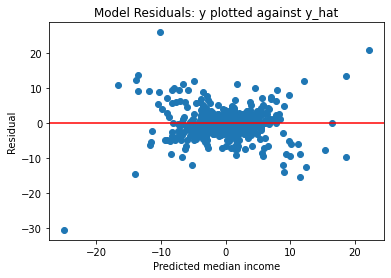

In [30]:
#check residuals
#Calculate the residuals: 

y_pred = model.predict() 

residuals = model.predict() - boston_diff['medv'] 

plt.scatter(y_pred,residuals) 

  

plt.title("Model Residuals: y plotted against y_hat") 

plt.axhline(0, color='red')  

  

plt.xlabel("Predicted median income")  

plt.ylabel("Residual")  

  

plt.show() 

4. Read the file student.csv. Develop an appropriate regression structure to predict daysabs. Note that the outcome is a count variable and therefore you must develop a Poisson regression for the problem. 

In [31]:
#csv imported into the directory.
#1. check the data 
student = pd.read_csv("student.csv")
student.head(30)
student.fillna(student.mean())

,id,gender,math,prog,daysabs
0,1001,0,63,2,4
1,1002,0,27,2,4
2,1003,1,20,2,2
3,1004,1,16,2,3
4,1005,1,2,2,3
...,...,...,...,...,...
309,2153,0,26,2,1
310,2154,1,79,3,3
311,2155,1,59,2,0
312,2156,1,90,3,0


In [34]:
lm = sm.Poisson(student['daysabs'], student[['gender','math','prog']])    

model = lm.fit()    

model.summary() 

Optimization terminated successfully.
         Current function value: 6.307984
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:                daysabs   No. Observations:                  314
Model:                        Poisson   Df Residuals:                      311
Method:                           MLE   Df Model:                            2
Date:                Sun, 23 Oct 2022   Pseudo R-squ.:                 -0.2775
Time:                        20:32:33   Log-Likelihood:                -1980.7
converged:                       True   LL-Null:                       -1550.5
Covariance Type:            nonrobust   LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
gender         0.8450      0.053     15.944      0.000       0.741       0.949
math           0.0017      0.001      1.611      0.107      -0.000       0.004
prog           0.4202      0.027     15.619      0.000       0.367       0.473
==============================================================================
"""

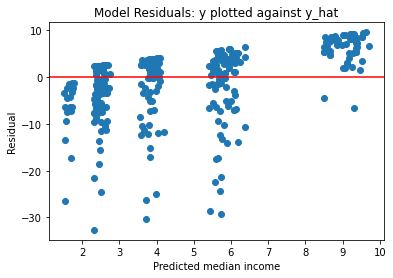

In [35]:
#check residuals
#Calculate the residuals: 

y_pred = model.predict() 

residuals = model.predict() - student['daysabs'] 

plt.scatter(y_pred,residuals) 

  

plt.title("Model Residuals: y plotted against y_hat") 

plt.axhline(0, color='red')  

  

plt.xlabel("")  

plt.ylabel("Residual")  

  

plt.show() 

5. Read the file Credit.csv. Develop an appropriate regression structure to predict the binary outcome Creditworthy based on all the other variables in the dataframe. 

In [36]:
#csv imported into the directory.
#1. check the data 
credit = pd.read_csv("Credit.csv")
credit.head(30)
#student.fillna(student.mean())

,Creditworthy,Acc1,Acc2,Duration,Amount,IntUse
0,0,1,0,24,1.511890,1
1,0,0,0,12,0.728080,1
2,0,0,1,18,1.048660,1
3,0,0,1,12,2.390290,1
4,0,0,1,24,1.522627,0
5,0,0,1,24,1.330893,1
6,0,0,1,36,2.395914,1
7,0,0,1,24,1.449512,1
8,0,1,0,21,0.819090,0
9,0,0,1,10,1.456159,1


In [38]:
# since the outcome is binary, we will use binary logistic regression.
lm = sm.MNLogit(credit['Creditworthy'], credit[['Acc1','Acc2','Duration','Amount','IntUse']])    

model = lm.fit()    

model.summary() 

Optimization terminated successfully.
         Current function value: 0.539997
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:           Creditworthy   No. Observations:                 1000
Model:                        MNLogit   Df Residuals:                      995
Method:                           MLE   Df Model:                            4
Date:                Sun, 23 Oct 2022   Pseudo R-squ.:                  0.1160
Time:                        20:53:36   Log-Likelihood:                -540.00
converged:                       True   LL-Null:                       -610.86
Covariance Type:            nonrobust   LLR p-value:                 1.200e-29
==================================================================================
Creditworthy=1       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Acc1               0.2237      0.155      1.440      0.150      -0.081       0.528
Acc2              -1.7835      0.182     -9.788      0.000      -2.141      -1.426
Duration           0.0135      0.007      2.012      0.044       0.000       0.027
Amount             0.0177      0.063      0.282      0.778      -0.105       0.140
IntUse            -0.8773      0.135     -6.501      0.000      -1.142      -0.613
==================================================================================
"""